In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# add the src folder to the path
import sys
sys.path.append('../')

from src.search import grid_search_cv
from src.utils import load_cup
from src.network import Network
from src.activations import ReLU, Tanh, Sigmoid
from src.losses import MeanSquaredError
from src.metrics import BinaryAccuracy,  MeanEuclideanError
from src.callbacks import EarlyStopping
from src.regularizers import L2


# load the dataset
x_train, x_val, y_train, y_val, scaler = load_cup(validation=True)


In [21]:
# perform 5-fold cross validation with best parameters to assess correct number of epochs
X, y, scaler = load_cup(scale_outputs=True, validation=False)

from src.validation import kfold_cv

reg = 6.31e-8
model = Network(9, L2(reg))
model.add_layer(32, ReLU(), initializer='xavier')
model.add_layer(16, ReLU(), initializer='xavier')
model.add_layer(2, Sigmoid(), initializer='xavier')

try:
    res = kfold_cv(
        model,
        X,
        y,
        k=10,
        metric=MeanEuclideanError(),
        loss=MeanSquaredError(),
        nesterov=0.6,
        epochs=1000,
        eta=0.014,
        verbose=True,
        scaler=scaler
    )
except KeyboardInterrupt:
    model.bar.close()

Training:  26%|██▌       | 258/1000[, loss=0.00381, val_loss=0.00312, val_acc=0.0627]


In [23]:
res

{'val_mee': 1.5121175935251137,
 'losses': 1.4978359063395694,
 'val_losses': 1.8286446286410574,
 'tr_mee': 1.3749041875059231}

In [38]:
reg = 6.31e-8
model = Network(9, L2(reg))
model.add_layer(32, ReLU(), 'xavier')
model.add_layer(16, ReLU(), 'xavier')
model.add_layer(2, Sigmoid(), initializer='xavier')

stats = model.train(
    eta=0.014, 
    nesterov=0.6, 
    train=(X, y),
    validation=(X_test, y_test), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=170,
)

Training: 100%|██████████| 170/170[, loss=0.00398, val_loss=0.00398, val_acc=0.0686]


In [24]:
y_pred = model.multiple_outputs(X)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_new = scaler.inverse_transform(y.reshape((y.shape[0], y.shape[1]))).reshape(y.shape)

metric = MeanEuclideanError()
print("MEE (real scale):", metric(y_pred_new, y_new))

MEE (real scale): 1.40431189158042


Text(0, 0.5, 'MSE')

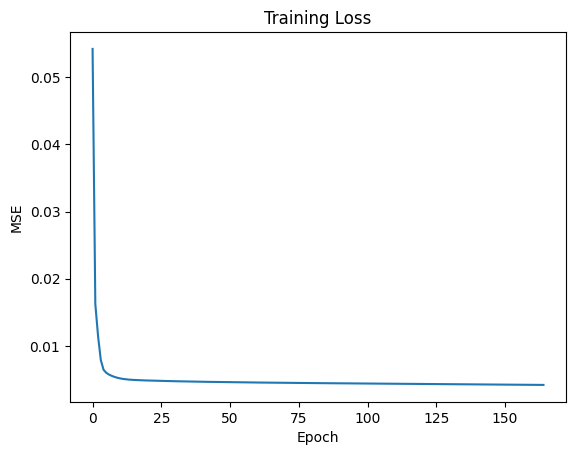

In [31]:
# plot stats

plt.plot(stats['train_loss'], label='train')
# set title
plt.title("Training Loss")
# set x label
plt.xlabel("Epoch")
# set y label
plt.ylabel("MSE")




In [39]:
from src.utils import load_cup_test
X_test, y_test = load_cup_test(scaler=scaler)
X_test.shape, y_test.shape

((298, 9, 1), (298, 2, 1))

In [43]:
y_pred = model.multiple_outputs(X_test)

y_pred_new = scaler.inverse_transform(y_pred.reshape((y_pred.shape[0], y_pred.shape[1]))).reshape(y_pred.shape)
y_test_new = scaler.inverse_transform(y_test.reshape((y_test.shape[0], y_test.shape[1]))).reshape(y_test.shape)

metric = MeanEuclideanError()
print("MEE (real scale):", metric(y_pred_new, y_test_new))

MEE (real scale): 1.5295524033561587


In [41]:
reg = 6.31e-8
model = Network(9, L2(reg))
model.add_layer(32, ReLU(), 'xavier')
model.add_layer(16, ReLU(), 'xavier')
model.add_layer(2, Sigmoid(), initializer='xavier')

stats = model.train(
    eta=0.014, 
    nesterov=0.6, 
    train=(X, y),
    validation=(X_test, y_test), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=170,
)


Training: 100%|██████████| 170/170[, loss=0.00423, val_loss=0.00508, val_acc=0.0762]


KeyError: 'train_metric'

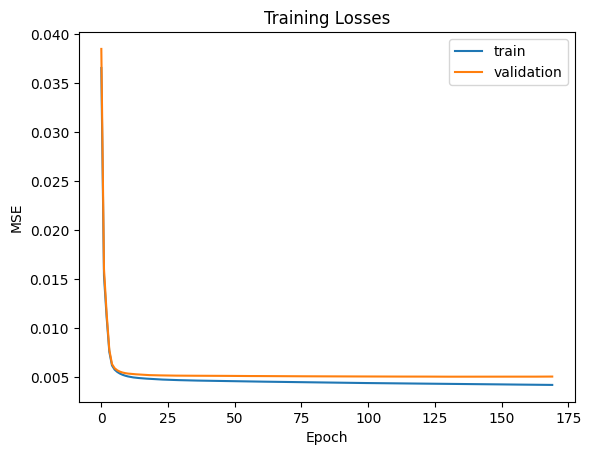

In [44]:
# plot validation loss and training loss

plt.plot(stats['train_loss'], label='train')
plt.plot(stats['val_loss'], label='validation')
# set title
plt.title("Training Losses")

# set x label
plt.xlabel("Epoch")
# set y label
plt.ylabel("MSE")
# show legend
plt.legend()

# plot validation loss and training loss

plt.plot(stats['train_metric'], label='train')
plt.plot(stats['val_metric'], label='test')
# set title

plt.title("Training Metrics")


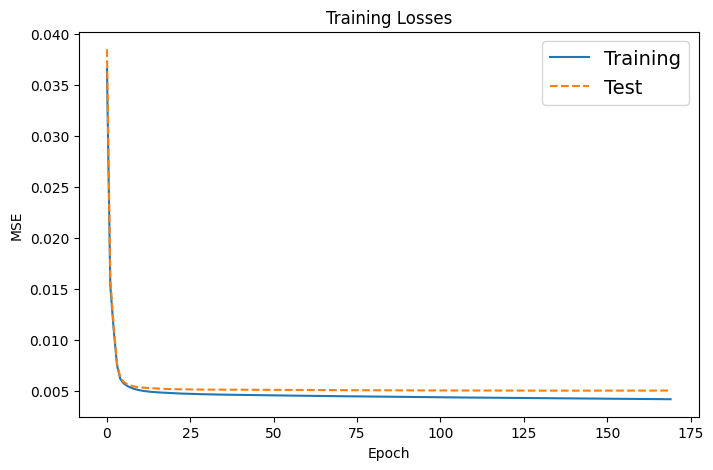

In [51]:
# create axes for ONE figure
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

sns.lineplot(stats['train_loss'], label='Training', ax=ax)
sns.lineplot(stats['val_loss'], label='Test', linestyle='--', ax=ax)

# set title
ax.set_title("Training Losses")
# set x label
ax.set_xlabel("Epoch")
# set y label
ax.set_ylabel("MSE")

# enlarge legend
ax.legend(fontsize=14)

In [9]:
model.bar.close()

Training:   4%|▎         | 6/170[, loss=0.0057, val_loss=0.0057, val_acc=0.087]


In [11]:
from src.utils import load_cup_cheat

X, y = load_cup_cheat(scaler=scaler)

reg = 6.31e-8
model = Network(9, L2(reg))
model.add_layer(32, ReLU(), 'xavier')
model.add_layer(16, ReLU(), 'xavier')
model.add_layer(2, Sigmoid(), initializer='xavier')

stats = model.train(
    eta=0.014, 
    nesterov=0.6, 
    train=(X, y),
    validation=(X, y), 
    metric=MeanEuclideanError(), 
    loss=MeanSquaredError(),
    epochs=170,
)

Training:  78%|███████▊  | 132/170[, loss=0.00433, val_loss=0.00433, val_acc=0.071] 

KeyboardInterrupt: 